In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

### Helpful functions

In [11]:
def integrate(func, x, a, b, axis=0, dt=0.001):
    if a == b:
        return np.zeros(x.shape[1])
    t = np.linspace(a, b, num=x.shape[0]) #int((b-a)/dt))
    # print(t.shape, x.shape)
    fs = func(x, t)
    return np.trapz(fs, dx=dt, axis=0)

def integrate2(func, x, T, axis=0, dt=0.001):
    fs = func(x, T, None)
    return np.cumsum(fs * dt, axis=1)

# Picard iterations

In [20]:
DT = 0.01
t0, tfinal = 0, 5
theta = 0
tau = 1
T = np.linspace(t0, tfinal, num=int((tfinal - t0) / DT))
NEURONS = 2
# W = np.array([[]])
W = np.random.random((NEURONS, NEURONS)) * 10 - 5
W = W.astype(int)
x0 = np.zeros((T.shape[0], NEURONS)) + 0.01

phi = lambda x: 1 / (1 + np.exp(-x))
f = lambda x, s, t: 1 / tau * phi(np.array([W@v for v in x]) + theta) # * np.expand_dims(np.exp(-(t-s)), axis=0).T

def picard_iter(x, f, T, x0, t0=0):
    x1 = x0 + np.array([integrate(lambda x, s: f(x, s, tf), x[:i], t0, tf, dt=DT) for i, tf in enumerate(T)]) #integrate(lambda t: f(x0, t), t0, T)
    # x1 = x0 + integrate2(f, x, T)
    return x1

xlast = x0
xcurr = -np.inf
xsols = []
thresh = 10**(-9)
i = 0
picard_dists = []
while True:
    xcurr = picard_iter(xlast, f, T, x0)
    xsols.append(xcurr.copy())
    picard_dists.append(np.linalg.norm(xlast - xcurr) )
    print(picard_dists[-1])
    if picard_dists[-1] < thresh:
        break
    xlast = xcurr.copy()
    i += 1

45.324829357800034
13.227839213232786
4.678580866864812
1.2663695314460621
0.3484428500869346
0.07725003031409951
0.015509168479758457
0.002753890179161078
0.00044019069100156177
6.35740342802194e-05
8.364866764265074e-06
1.008935128165185e-06
1.1222979379341102e-07
1.1572919898892795e-08
1.111436771173889e-09
9.981449657170822e-11


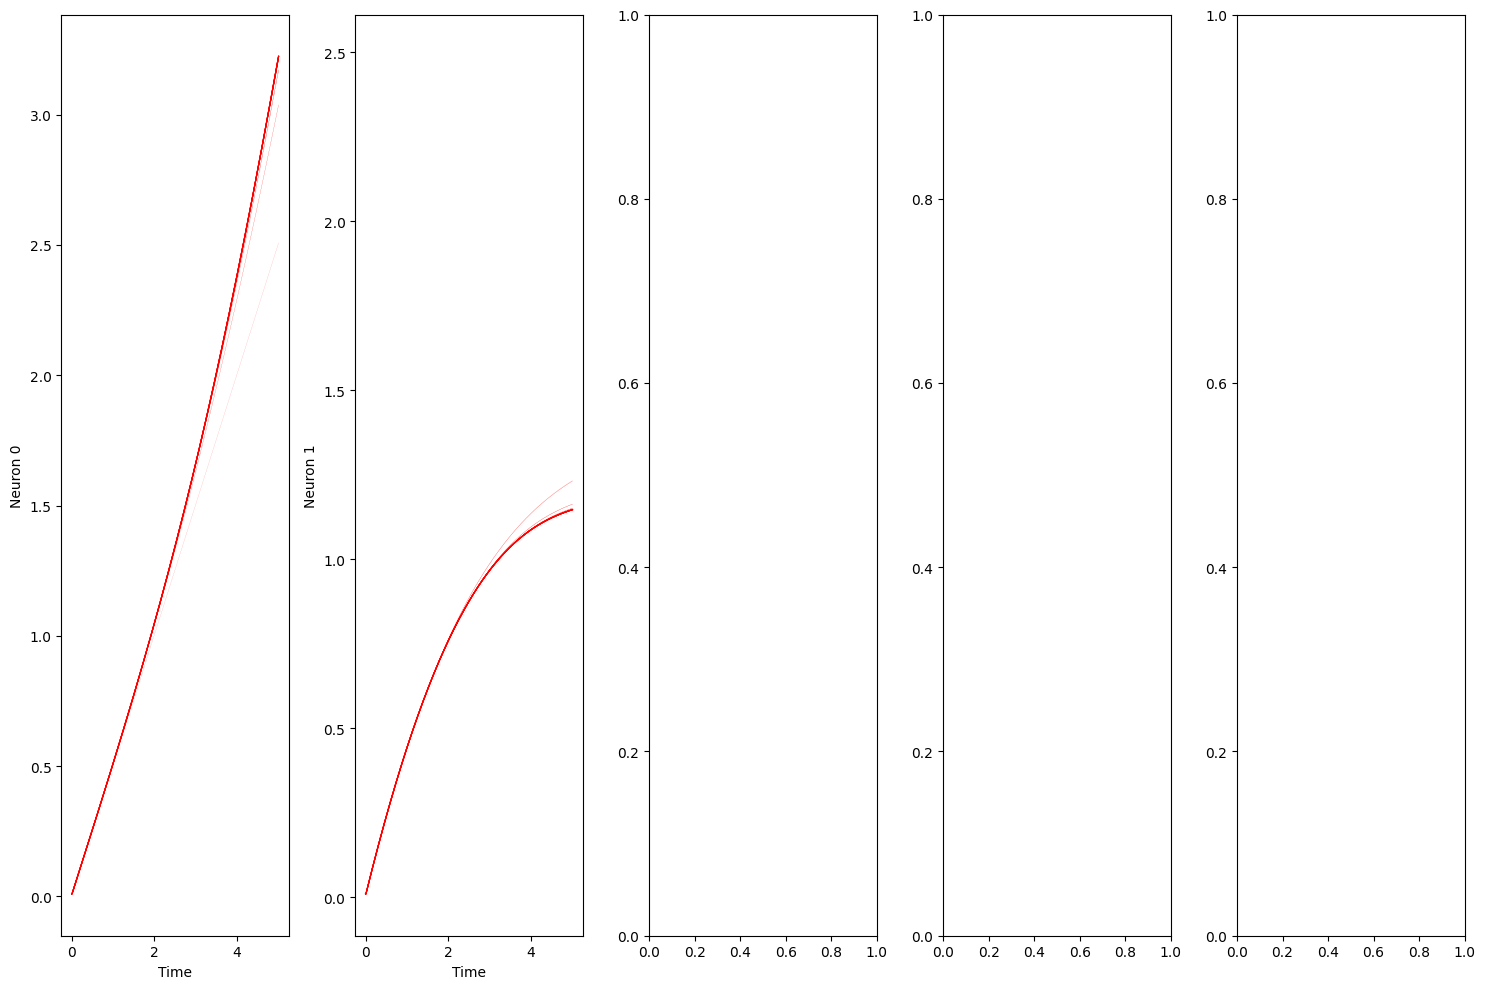

In [21]:
PER_ROW = 5
fig, axs = plt.subplots(nrows=np.ceil(NEURONS / PER_ROW).astype(int), ncols=PER_ROW)
axs = axs.flatten()
for n in range(NEURONS):
    for i, x in enumerate(xsols):
        axs[n].plot(T, x[:,n], color='red', lw=(i / (len(xsols))))
        axs[n].set_xlabel('Time')
        axs[n].set_ylabel(f'Neuron {n}')
fig.set_size_inches((15, 10))
fig.tight_layout()
plt.show()

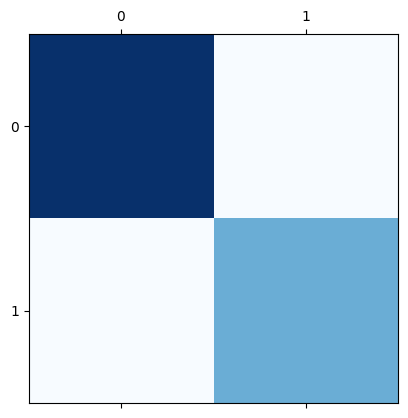

In [22]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

min_val, max_val = -5, 5

intersection_matrix = W

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

# for i in xrange(15):
#     for j in xrange(15):
#         c = intersection_matrix[j,i]
#         ax.text(i, j, str(c), va='center', ha='center')

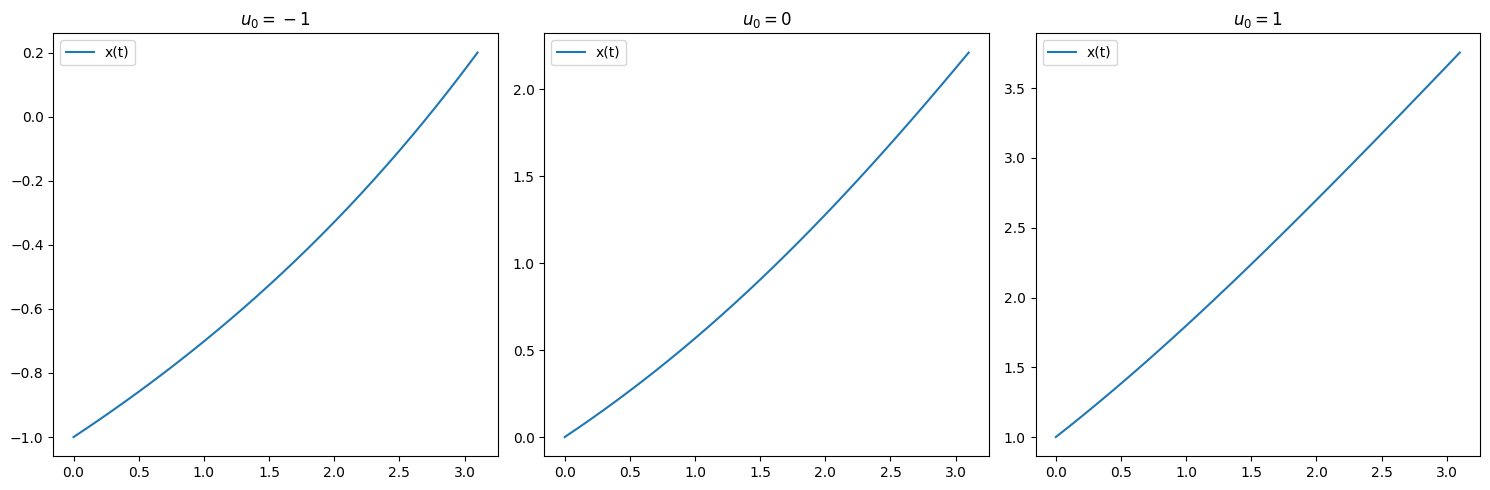

In [36]:
U0 = [-1, 0, 1]
fig, axs = plt.subplots(nrows=1, ncols=3)
for idx, u0 in enumerate(U0):
    C0 = np.log(u0 + np.pi / 2)
    F = lambda t, x: 1 / (1 + np.exp(-x))
    v = lambda t: np.exp(t + C0) - np.pi / 2

    t_eval = np.arange(0, np.pi, 0.1)
    sol = solve_ivp(F, [0, np.pi], [u0], t_eval=t_eval)

    axs[idx].plot(sol.t, sol.y[0], label='x(t)')
    # axs[idx].plot(t_eval, v(t_eval), label  = 'v(t)')
    axs[idx].set_title(f'$u_0 = {u0}$')
    axs[idx].legend()
fig.set_size_inches((15, 5))
plt.tight_layout()
plt.savefig('p1.jpeg', dpi=500)

In [58]:
np.cumsum([1,2,3])

array([1, 3, 6])

In [132]:
np.array([[-0.4988,  0.7565, -1.2760]]).repeat(T.shape[0], axis=0)

array([[-0.4988,  0.7565, -1.276 ],
       [-0.4988,  0.7565, -1.276 ],
       [-0.4988,  0.7565, -1.276 ],
       ...,
       [-0.4988,  0.7565, -1.276 ],
       [-0.4988,  0.7565, -1.276 ],
       [-0.4988,  0.7565, -1.276 ]])

In [141]:
v = np.ones((2,2)) * 7
print(v)

np.linalg.norm(v)

[[7. 7.]
 [7. 7.]]


14.0

In [26]:
import autograd.numpy as np
from autograd import grad, jacobian

x = np.random.random((1, NEURONS))

cost = lambda x: f(x, None, None)
print(cost(x))
# gradient_cost = grad(cost)
jacobian_cost = jacobian(lambda x: f(x, None, None))

jacobian_cost(x)

[[0.30136904 0.49712478]]


array([[[[ 0.21054574, -0.21054574]],

        [[-0.24999173,  0.        ]]]])